# Détection de Fraude à la carte bancaire

Vous allez travailler sur un vrai jeu de données anonymisé contenant une liste de transaction avec des propriétés ainsi qu'une classe : transaction valide ou frauduleuse.

Ce projet va vous permettre par la pratique de découvrir le cycle de vie d'un travail de Machine Learning pour la détection d'anomalies.

L'ensemble des fonctions vous seront fournises, ce qui vous permettra de intéresser au "QUOI" et au "POURQUOI" plutôt que sur le "COMMENT".

## Cycle de vie du Machine Learning

Chaque projet de Machine Learning passe par plusieurs étapes :

1. Découverte et compréhension des données
2. Nettoyage (statistique) des données
3. Choix du/des modèle(s) de Machine Learning en fonction du problème posé
4. Entraînement du/des modèle(s) et évaluation des résultats
5. Optimisation du/des modèle(s) => vous ferez pas cette partie en autonomie ! 

## Découverte et compréhension des données

In [27]:
import pandas as pd

transactions = pd.read_csv('creditcard_data.csv')

transactions.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,legit
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Pour commencer, utilisez les fonctions pandas à votre disposition pour évaluer une première fois l'échantillon de données fournies :

* `transactions.info()`
* `transactions.describe()`
* `transactions.columns`

In [28]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [29]:
transactions.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,legit
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
transactions.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'legit'],
      dtype='object')

La propriété `fraudulent` permet de distinguer les transactions frauduleuses de celles qui sont légitimes :
* Elles sont **légitimes** si la propriété `legit` est vraie (égale à 1)
* Elles sont **frauduleuses** si la propriété `legit` est fausse (égale à 0)

Dans le jeu de données proposé, combien de chaque ?

Vous pouvez utiliser la fonction `query()`, par exemple si l'on souhaitait récupérer les transactions dont les montants sont supérieurs à 10 :

```python
result = transactions.query('amount > 10')
```

Pour compter un nombre de lignes d'un DataFrame, vous pouvez utiliser la fonction `count()` :

```python
count = transactions.count()
```

In [31]:
legit_transactions = transactions.query('legit == 0')
fraudulent_transactions = transactions.query('legit == 1')

print('Transactions valides : '+ str(legit_transactions.v1.count()))
print('Transactions frauduleuses : '+ str(fraudulent_transactions.v1.count()))

Transactions valides : 284315
Transactions frauduleuses : 492


Que pensez-vous de la proportion des transactions quand il s'agit de savoir si elles sont légitimes ou frauduleuses et quel va être l'impact sur la qualité de l'entraînement d'un modèle de machine learning ?

> Protip: Googlez l'expression "umbalanced dataset for fraud detection"

Ecrivez votre réponse ici :

...

## Nettoyage (statistique) des données

Les modèles de Machine Learning sont incompatibles avec des valeurs nulles ou qui ne sont pas numériques.

Pour évaluer le nombre de valeurs nulles par colonne, vous pouvez utiliser la fonction `isnull()` suivi de la fonction `sum()`.

Evaluez le nombre de valeurs nulles dans l'échantillon :

In [32]:
transactions.isnull().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
legit     0
dtype: int64

Qu'en pensez-vous ? Y-a-t-il une action de votre part à effectuer pour nettoyer le jeu de données ?

Et si la réponse est "oui", que feriez-vous ?
Et si la réponse est "non", expliquez pourquoi.

Ecrivez votre réponse ici :

...

### **Sampling du jeu de données**

Vous cherchez à construire un modèle pour détecter les fraudes, mais comme nous l'avons vu précédemment nous avons à notre disposition **énormément** plus de données pour la détection de transactions valides que pour la détection de fraudes invalides.

En Machine Learning, il est commun d'adapter son jeu de données quand il est déséquilibré de sorte à présenter au modèle plus d'informations utiles.

Pour cela, nous allons construire équilibré. Puisque nous n'avez que XX transactions frauduleuses, vous devez extraire un échantillon de même taille ou équivalent de transactions valides.

Il existe la fonction `sample()` qui permet de récupérer l'échantillon de taille voulu. Par exemple :

```python
fraudulent_transactions_sample = fraudulent_transactions.sample(n=492)
```

Ensuite, pour assembler les deux jeux de données ('frauduleux','valide') en un seul `DataFrame` vous pouvez utiliser la fonction `concat()` :

```python
transactions_v2 = pd.concat([fraudulent_sample, legit_sample], axis='rows')
```

> Pour vérifier la taille de l'échantillon, n'oubliez pas l'argument `shape` disponible sur un `DataFrame`.

In [33]:
legit_transactions_sample = legit_transactions.sample(492)

transactions_dataset = pd.concat([legit_transactions_sample, fraudulent_transactions])

transactions_dataset.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,legit
160184,113154.0,-1.383524,-0.664584,1.842021,-3.826554,0.067715,-0.389561,0.209225,0.290994,1.573235,...,0.215278,0.355360,-0.106182,0.684735,0.770016,-1.046582,0.033594,0.076237,99.99,0
278067,168021.0,-1.475364,2.134763,-1.545804,-1.992495,1.777199,-0.554459,1.994412,-0.702662,1.483375,...,-0.151773,0.685090,-0.323574,-0.121570,0.069390,0.042531,0.729530,0.066146,0.92,0
29857,35662.0,1.455619,-0.535345,-0.004334,-1.010874,-0.515880,-0.158169,-0.661282,0.006399,-0.915820,...,0.120177,0.238375,-0.177162,-0.702151,0.597267,-0.158261,-0.002469,-0.006899,5.00,0
154995,103963.0,2.035557,0.089604,-1.299490,0.573711,0.079339,-1.460485,0.339039,-0.485598,1.832850,...,-0.281727,-0.560979,0.229239,-0.060165,-0.061213,-0.532985,-0.064942,-0.058948,24.99,0
105977,69767.0,1.076925,0.028522,0.469944,1.348468,-0.307769,0.006279,-0.089503,0.181548,0.192852,...,-0.040893,-0.010614,-0.048826,0.213647,0.560716,-0.340581,0.025754,0.008091,23.81,0


# Choix du/des algorithme(s) de Machine Learning

Vous êtes face à un problème de classification à 2 classes : soit une transaction est frauduleuse, soit elle ne l'est pas.

Prenez le temps de consulter [cette page Wikipédia](https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Algorithme_de_classification) : quel(s) algorithme(s) vous semblent les plus adaptés pour l'entraînement d'un modèle de Machine Learning dans le cadre de la détection de fraude ?

Votre réponse ici :


> Pour la suite, nous allons utiliser 1 algorithme très simple à mettre en place : K-Nearest Neighbours

### L'algorithme de classification K-NN

Tout d'abord, prenez le temps de vous renseigner sur le [fonctionnement de l'algorithme K-NN](https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-entrainez-votre-premier-k-nn).

Ensuite, vous allez implémenter l'algorithme à l'aide de la librairie [scikit-learn](https://scikit-learn.org/stable/).

> Rassurez-vous une bonne partie du code vous est fourni.

In [34]:
from sklearn.model_selection import train_test_split

variables = transactions_dataset.drop(['time', 'legit'], axis='columns')
legit_or_fraudulent = transactions_dataset['legit']

#
# Préparation des jeux de données de test et d'entraînement
#

X_train, X_test, Y_train, Y_test = train_test_split(variables.values, legit_or_fraudulent.values, train_size=0.7, random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

#
# Création de notre Classifier
#
knn=KNeighborsClassifier()

#
# Entraînement du modèle à l'aide des données d'entraînement
#
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Notre modèle est maintenant entraîné à l'aide du jeu de données à l'exclusion de `time` et de `legit`.

Nous allons donc maintenant essayer de prédire la valeur de la colonne `legit` que nous connaissons dans nos données de test en retirant cette colonne et en regardant comment se comporte notre modèle entraîné.

> Evidemment pour la colonne "legit", puisque c'est ce que vous essayez de prédire 😉

In [36]:
#
# Et hop ! On lance les prédictions
#
knn_predictions = knn.predict(X_test)

# Décommentez cette ligne pour voir vos prédictions 
#print(knn_predictions)

[1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0
 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1]


## Evaluations des résultats

Il y a de nombreuses façons d'évaluer la qualité des résultats.
Je vous propose d'explorer ensemble les différentes méthodes en établissant une matrice de confusion à l'aide de scikit-learn.

Pour commencer, prenez le temps de lire cet article qui vulgarise les principaux concepts liés à la lecture et l'évaluation d'une [matrice de confusion](https://datascientest.com/danielcomment-lire-et-exploiter-une-matrice-de-confusion).

A votre avis, qu'est-ce qui est le plus important pour la __qualité__ de notre modèle : détecter toutes les fraudes quite à se tromper ou au contraire laisser passer quelques transactions frauduleuses ?

Votre réponse ici :

...

Pour construire la matrice de confusion de votre modèle, vous allez utiliser la fonction `confusion_matrix` du module `metrics` de `sklearn`.

Cette fonction accepte 2 arguments :

* D'abord les valeurs réelles, ici ce serait `Y_test`;
* Puis les valeurs prédites, ici `knn_predictions`;


> Pour rappel !  Si la valeur de `legit` vaut 1 alors, la transaction est frauduleuse.

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, knn_predictions)
print(cm)

[[140  10]
 [ 18 128]]


Vous avez affiché une matrice mais elle est difficile à interpréter, n'est-ce pas ?

Prenez le temps de lire la page de [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) et surtout les exemples pour afficher une matrice de confusion exploitable.

En bref, vous devrez importer l'objet `ConfusionMatrixDisplay` du module `metrics` de `scikit-learn` et le module `pyplot` de la librairie `matplotlib`.

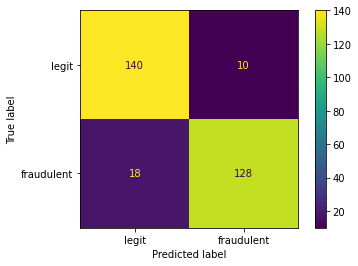

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['legit', 'fraudulent'])
disp.plot()
plt.show();

A partir de cette matrice, combien comptez-vous de :

- faux positifs ? 18
- faux négatifs ? 4
- vrais positifs ? 133
- vrais négatifs ? 141

Que pensez-vous de ces résultats ?

Votre réponse ici :

...

Pour construire la matrice de confusion de votre modèle, vous allez utiliser la fonction `classification_report` du module `metrics` de `sklearn`.

Cette fonction accepte 2 arguments :

* D'abord les valeurs réelles, ici ce serait `Y_test`;
* Puis les valeurs prédites, ici `knn_predictions`;


> Pour rappel !  Si la valeur de `legit` vaut 1 alors, la transaction est frauduleuse.

In [39]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       150
           1       0.93      0.88      0.90       146

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



## Optimisation du modèle de Machine Learning

Vous pourriez être satisfait des résultats ... ou pas ?

Pouvez-vous améliorer la performance de votre modèle ?

Je vous propose dans cette partie et en semi-autonomie d'expérimenter les différentes options qui se présentent à vous pour essayer d'améliorer la performance.

### **Les (hyper) paramètres de l'algorithme K-NN**

Si chaque algorithme dans scikit-learn fonctionne globalement de la même façon (fit()/predict()), ils disposent chacun de nombreux paramètres qu'il vous appartient de customiser pour évaluer l'impact sur les performances de votre modèle.

Par exemple, le paramètre principal de l'algorithme [K-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) s'appelle `n_neighbors` qui correspond aux nombres de voisins considérer pour regrouper les individus de l'échantillon.

La question que vous vous posez probablement à ce stade, c'est probablement celle-ci :

> "D'accord, mais comment je trouve le bon nombre de neighbors ?"

Et bien, vous pourriez évaluer l'erreur test et afficher la performance en fonction du nombre de voisins considérés. Pour effectuer cela, vous pouvez - par exemple - suivre les instructions décrites dans [cet article](https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-entrainez-votre-premier-k-nn#/id/r-4141748).

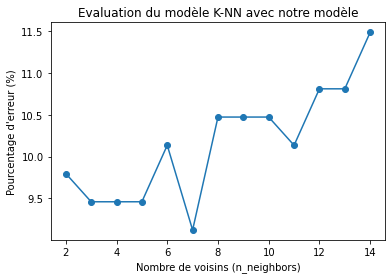

In [40]:
errors = []
for n_neighbors in range(2,15):
    knn = KNeighborsClassifier(n_neighbors)
    errors.append(100*(1 - knn.fit(X_train, Y_train).score(X_test, Y_test)))

# Affichage des erreurs en fonction du nombre de voisins
plt.plot(range(2,15), errors, 'o-')
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Pourcentage d\'erreur (%)')
plt.title('Evaluation du modèle K-NN avec notre modèle')
plt.show();

Quelle est la valeur optimale pour le paramètre `n_neighbors` au regard de votre évaluation de l'erreur test ?

Quelle est la valeur par défaut de ce paramètre ?

Ajoutez votre réponse ici :

...

### **Optimisation des paramètres** d'un algorithme

A ce stade, ce devrait être la troisième fois que vous consultez la documentation de [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Au delà du paramètre `n_neighbors`, ce Classifier dispose de nombreux autres paramètres qui peuvent avoir un impact sur la performance de votre modèle.

Pour obtenir la liste des paramètres les plus optimisés, vous pourriez établir la liste - ou plutôt la grille - des possibilités jusqu'à obtenir à force de tests les meilleurs.

Heureusement pour vous, Scikit-learn fournit une classe appelée [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV).

Pour cela, vous devez import la classe `GridSearchCV` du module `modele_selection` de la librairie Scikit-learn :

```python
from sklearn.model_selection import GridSearchCV

# La grille correspond aux paramètres et aux valeurs possibles
grid_params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params
)

gs_results = gs.fit(X_train, Y_train)

# Liste des meilleurs paramètres
print(gs_results.best_params_)
```

Essayez par vous même pour obtenir la liste des meilleurs paramètres, puis ré-évaluez la performance de votre modèle avec un KNeighborsClassifier configuré avec ces paramètres :

In [41]:
from sklearn.model_selection import GridSearchCV

# La grille correspond aux paramètres et aux valeurs possibles
grid_params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params
)

gs_results = gs.fit(X_train, Y_train)

# Liste des meilleurs paramètres
print(gs_results.best_params_)

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [42]:
# Création et entraînement du modèle
optimized_knn=KNeighborsClassifier(
    n_neighbors=gs_results.best_params_['n_neighbors'],
    weights=gs_results.best_params_['weights'],
    metric=gs_results.best_params_['metric']
)

optimized_knn.fit(X_train, Y_train)

# Prédiction sur les données de test
predictions = optimized_knn.predict(X_test)

# Résultats
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       150
           1       0.95      0.88      0.91       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



Après application des meilleurs paramètres possibles, est-ce que votre modèle de machine learning est plus performant ?

Si oui, à quel point ?

Ajoutez votre réponse ici :


...

### **Transformation des données pour le Machine Learning : Scaling**

Une bonne façon d'améliorer les performances d'un modèle est de mieux préparer les données.

Dans une première partie, vous aviez équilibré la proportion des transactions valides et frauduleuses.

Poursuivez l'analyse des données, par exemple quelles sont les valeurs minimales et maximales de chacune de variables considérées ?

Votre réponse ici :

...

Quand vous avez des variables avec des écarts de valeur extrêmes, ces variables ont un impact plus important sur la qualité de la prédiction du modèle. Pour pallier à ce problème, vous pouvez appliquer une opération de mise à l'échelle de toutes vos données (dit autrement, de "scaling").

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
amount = transactions['amount'].values

transactions['amount'] = scaler.fit_transform(amount.reshape(-1,1))
print(transactions['amount'])
```

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
amount = transactions['amount'].values

transactions['amount'] = scaler.fit_transform(amount.reshape(-1,1))

Maintenant, ré-entraînez à nouveau votre modèle : est-ce que vous notez une amélioration de la performance ?

> Attention ! Pensez bien à reconstruire les jeux de données d'entraînement et de test

In [44]:

desc_vars = transactions_dataset.drop(['time', 'legit'], axis='columns')
detected = transactions_dataset['legit']

X_train, X_test, Y_train, Y_test = train_test_split(desc_vars.values, detected.values, train_size=0.7, random_state=42)
scaled_knn=KNeighborsClassifier()

scaled_knn.fit(X_train, Y_train)

# Prédiction sur les données de test
predictions = scaled_knn.predict(X_test)

# Résultats
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       150
           1       0.93      0.88      0.90       146

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



Votre réponse ici :

...

## Et pour la suite ? Ton TP est trop simple

* Vous pouvez essayer avec d'autres algorithmes
* Voir plusieurs en même temps avec des algorithmes d'ensemble
* Essayer d'autres encoders pour encore nettoyer les données
* Evaluer l'under/overfitting à l'aide de d'une [Courbe ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay)
* Développer une petite application web qui permet d'ajouter de nouvelles données et de retourner la prédiction
* Et tant d'autres choses !

Vous l'aurez compris : l'amélioration de performance d'un modèle est un **processus itératif** et nous pourrions sans problème passer 1 semaine sur ce projet.